In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

# **image Preprocess**

In [2]:
images_path = '../input/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [3]:
images[:5]

['../input/flickr8k-sau/Flickr_Data/Images/3226254560_2f8ac147ea.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/214543992_ce6c0d9f9b.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2366643786_9c9a830db8.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/3368819708_0bfa0808f8.jpg',
 '../input/flickr8k-sau/Flickr_Data/Images/2190227737_6e0bde2623.jpg']

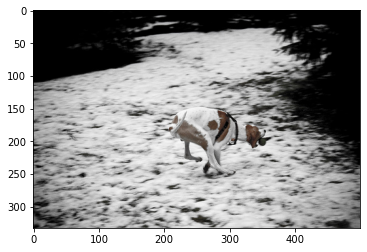

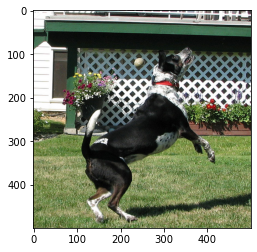

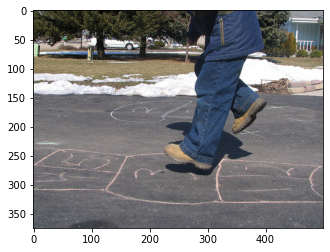

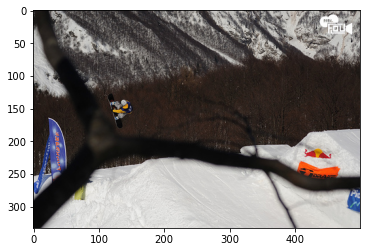

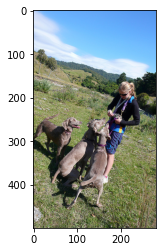

In [4]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [6]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        
    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [16]:
len(images_features)

1500

# **Text Preprocess**

In [17]:
caption_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [18]:
#using open in order to read this txt file
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [19]:
len(captions)

40461

In [22]:
#image as key and every image has 5 caption so it will have cation as its value
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] #using the 0th column and in the 0th column getting rid o flast two characters
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [24]:
captions_dict

{'1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a girl with pigtails sitting in front of a rainbow painting .',
  'Young girl with pigtails painting outside in the grass .'],
 '102351840_323e3de834.jpg': ['A man drilling a hole in the ice .',
  'A man is drilling through the frozen ice of a pond .',
  'A person in the snow drilling a hole in the ice .',
  'A person standing on a frozen lake .',
  'Two men are ice fishing .'],
 '1024138940_f1fefbdce1.jpg': ['Two different breeds of brown and white dogs play on the beach .',
  'Two dogs are making a turn on a soft sand beach .',
  'Two dogs playing in the sand at the beach .',
  'Two dogs playing together on a beach .',
  'Two large tan dogs play along a sandy beach .'],
 '10320

# **Visualize Images with captions**

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '../input/flickr8k-sau/Flickr_Data/Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [25]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [27]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [30]:
captions_dict # now all are in lower case and have startofsequence and end of sequence

{'1002674143_1b742ab4b8.jpg': ['startofseq startofseq a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . endofseq endofseq',
  'startofseq startofseq a little girl is sitting in front of a large painted rainbow . endofseq endofseq',
  'startofseq startofseq a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it . endofseq endofseq',
  'startofseq startofseq there is a girl with pigtails sitting in front of a rainbow painting . endofseq endofseq',
  'startofseq startofseq young girl with pigtails painting outside in the grass . endofseq endofseq'],
 '102351840_323e3de834.jpg': ['startofseq startofseq a man drilling a hole in the ice . endofseq endofseq',
  'startofseq startofseq a man is drilling through the frozen ice of a pond . endofseq endofseq',
  'startofseq startofseq a person in the snow drilling a hole in the ice . endofseq endofseq',
  'startofseq startofseq a person standing on a frozen lake 

# **Create Vocabulary**

In [34]:
# all the words in the caption
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [35]:
len(count_words)

4073

In [36]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [37]:
len(new_dict)

4073

In [38]:
new_dict['<OUT>'] = len(new_dict) 

In [39]:
captions_backup = captions_dict.copy()

In [40]:
captions_dict = captions_backup.copy()

In [41]:
#converting strings to integer
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [42]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18,
   18],
  [1, 1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18, 18],
  [1,
   1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18,
   18],
  [1, 1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18, 18],
  [1, 1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18, 18]],
 '102351840_323e3de834.jpg': [[1, 1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18, 18],
  [1, 1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18, 18],
  [1, 1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18, 18],
  [1, 1, 2, 43, 45, 29, 2, 41, 46, 17, 18, 18],
  [1, 1, 47, 48, 49, 39, 50, 17, 18, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18,
   18],
  [1, 1, 47, 55,

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [43]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [44]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18, 18]
[1, 1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18, 18]
[1, 1, 2, 180, 190, 6, 2, 77, 191, 54, 77, 192, 193, 2, 53, 194, 121, 2, 41, 46, 54, 195, 196, 17, 18, 18]
[1, 1, 23, 131, 6, 23, 77, 122, 19, 706, 2, 700, 701, 467, 2, 128, 265, 23, 131, 6, 23, 245, 385, 707, 73, 621, 151, 93, 17, 18, 18]
[1, 1, 23, 47, 34, 178, 49, 6, 126, 54, 27, 1049, 54, 1050, 318, 281, 6, 2, 1051, 81, 322, 49, 69, 1052, 279, 2, 36, 1053, 6, 1049, 54, 2, 364, 18, 18]
[1, 1, 318, 188, 27, 205, 19, 35, 23, 156, 81, 472, 27, 205, 13, 2, 126, 2264, 29, 442, 298, 19, 149, 83, 2, 626, 465, 156, 318, 147, 567, 279, 2, 523, 1103, 17, 18, 18]


In [45]:
MAX_LEN

38

In [46]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18,
   18],
  [1, 1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18, 18],
  [1,
   1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18,
   18],
  [1, 1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18, 18],
  [1, 1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18, 18]],
 '102351840_323e3de834.jpg': [[1, 1, 2, 36, 37, 2, 38, 6, 23, 39, 17, 18, 18],
  [1, 1, 2, 36, 19, 37, 40, 23, 41, 39, 10, 2, 42, 17, 18, 18],
  [1, 1, 2, 43, 6, 23, 44, 37, 2, 38, 6, 23, 39, 17, 18, 18],
  [1, 1, 2, 43, 45, 29, 2, 41, 46, 17, 18, 18],
  [1, 1, 47, 48, 49, 39, 50, 17, 18, 18]],
 '1024138940_f1fefbdce1.jpg': [[1,
   1,
   47,
   51,
   52,
   10,
   53,
   54,
   27,
   55,
   56,
   29,
   23,
   57,
   17,
   18,
   18],
  [1, 1, 47, 55,

In [47]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]
                #all the in sequence will be of constant length
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [48]:
X, y_in, y_out = generator(images_features, captions_dict)

In [49]:
len(X), len(y_in), len(y_out)

(111528, 111528, 111528)

In [50]:
#converting all of them to numpy array so that processing can be faster
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [51]:
X.shape, y_in.shape, y_out.shape

((111528, 2048), (111528, 38), (111528, 4074))

In [52]:
X[1510]

array([0.00245637, 0.6232479 , 0.68544203, ..., 0.41578805, 1.1413945 ,
       0.3384066 ], dtype=float32)

In [53]:
y_in[2]

array([1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

# **MODEL**

In [54]:

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [55]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 38, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 38, 128)           521472    
_________________________________________________________________
lstm (LSTM)                  (None, 38, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 38, 128)           32896     
Total params: 948,608
Traina

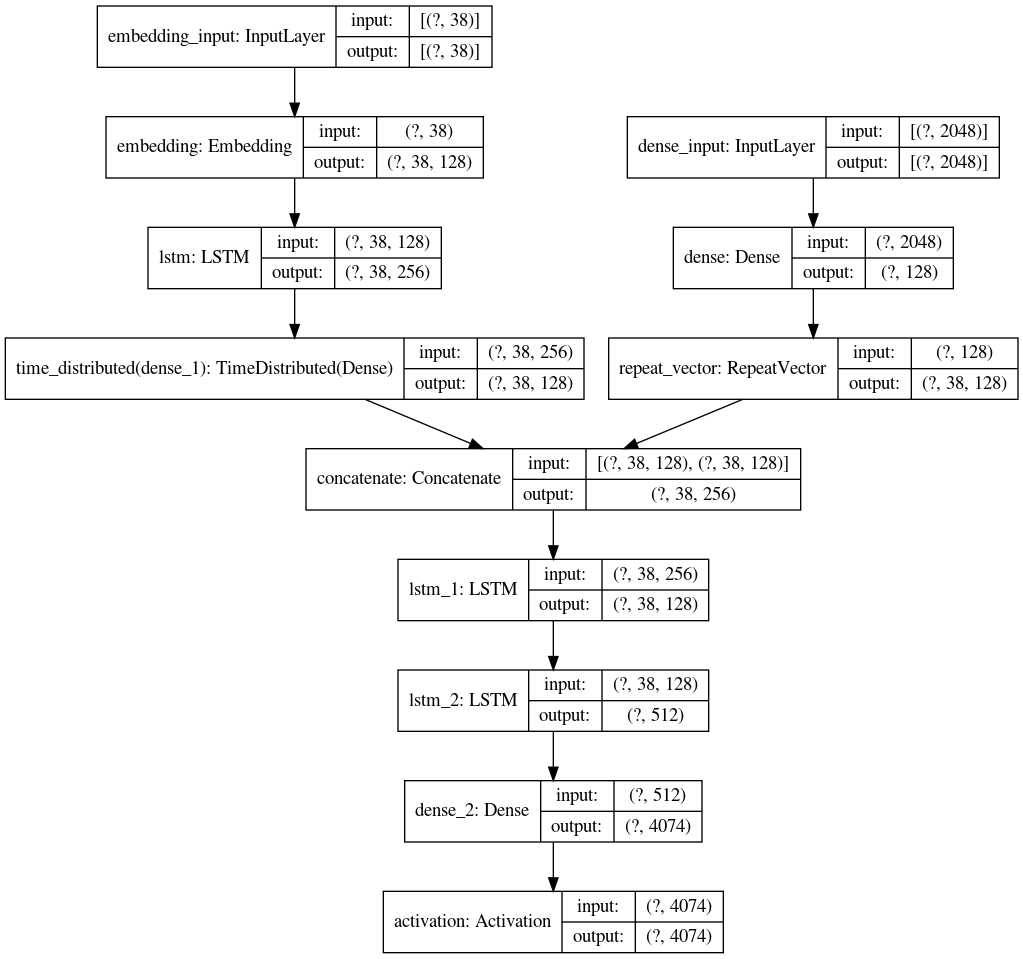

In [56]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [57]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
218/218 [==============================] - 15s 69ms/step - loss: 4.8688 - accuracy: 0.1751
Epoch 2/50
218/218 [==============================] - 15s 69ms/step - loss: 4.6471 - accuracy: 0.1945
Epoch 3/50
218/218 [==============================] - 15s 69ms/step - loss: 4.5640 - accuracy: 0.2106
Epoch 4/50
218/218 [==============================] - 15s 69ms/step - loss: 3.9752 - accuracy: 0.3175
Epoch 5/50
218/218 [==============================] - 15s 68ms/step - loss: 3.7445 - accuracy: 0.3483
Epoch 6/50
218/218 [==============================] - 15s 68ms/step - loss: 3.6065 - accuracy: 0.3614
Epoch 7/50
218/218 [==============================] - 15s 68ms/step - loss: 3.5007 - accuracy: 0.3712
Epoch 8/50
218/218 [==============================] - 15s 68ms/step - loss: 3.3922 - accuracy: 0.3822
Epoch 9/50
218/218 [==============================] - 15s 68ms/step - loss: 3.2429 - accuracy: 0.4021
Epoch 10/50
218/218 [==============================] - 15s 68ms/step - loss: 3.108

In [58]:
inv_dict = {v:k for k, v in new_dict.items()}

In [59]:
model.save('model.h5')

In [60]:
model.save_weights('mine_model_weights.h5')

In [62]:
np.save('vocab.npy', new_dict)

In [64]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

# **Predictions**

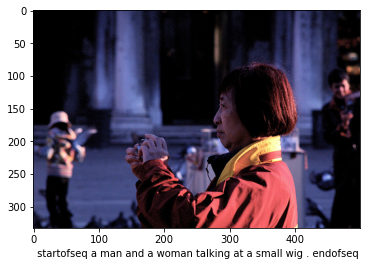

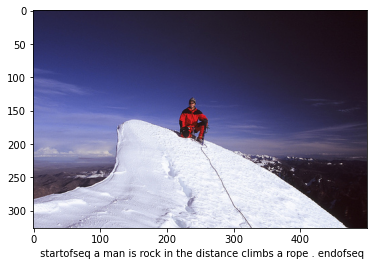

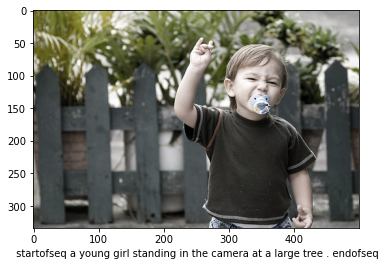

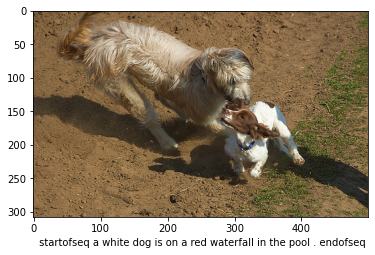

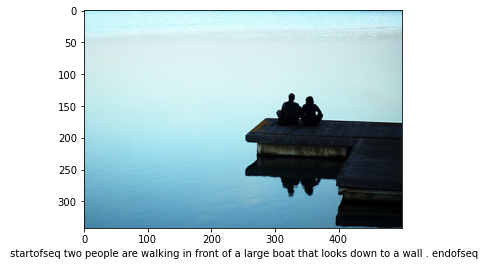

In [65]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)